In [3]:
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns; sns.set_theme()
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap
import os

# Шаг 1 Загружаем файлы
Скачиваем отдельные файлы с каунтами из датасета - https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE103967

Нас интересуют файлы, соответсвующие клеткам "CD45- Epcam+ (4-6 weeks)

In [11]:
# Download CD45- EpCAM+ cells
gsm_list = [
            ('7017', '1395'),
            ('7018', '1396'),
            ('7019', '1398'),
            ('7020', '1458'),
            ('7021', '1459'),
            ('7022', '1539'),
            ('7023', '1540'),
            ('7024', '1541'),
            ('7025', '1542'),
            ('7026', '1544'),
            ('7027', '1545'),
            ('7028', '1546'),
            ('7029', '1646'),
            ('7030', '1647'),
            ('7031', '1648'),
            ('7032', '1649'),
            ('7033', '1751'),
            ('7034', '1753'),
            ('7035', '1792'),
            ('7036', '1793'),
            ('7037', '1795'),
]

for gsm, ab in tqdm(gsm_list):
    url = f'https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM278{gsm}/suppl/GSM278{gsm}_AB{ab}.txt.gz'
    gzip = f'GSM278{gsm}_AB{ab}.txt.gz'
    filename =  f'GSM278{gsm}_AB{ab}.txt'
    !wget -c -nv "$url"
    !gzip -f -d "$gzip"
    !mv "$filename" ../data/


  0%|          | 0/21 [00:00<?, ?it/s]

2022-12-13 15:57:34 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787017/suppl/GSM2787017_AB1395.txt.gz [484276/484276] -> "GSM2787017_AB1395.txt.gz" [1]
2022-12-13 15:57:37 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787018/suppl/GSM2787018_AB1396.txt.gz [398303/398303] -> "GSM2787018_AB1396.txt.gz" [1]
2022-12-13 15:57:39 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787019/suppl/GSM2787019_AB1398.txt.gz [490402/490402] -> "GSM2787019_AB1398.txt.gz" [1]
2022-12-13 15:57:41 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787020/suppl/GSM2787020_AB1458.txt.gz [393417/393417] -> "GSM2787020_AB1458.txt.gz" [1]
2022-12-13 15:57:44 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787021/suppl/GSM2787021_AB1459.txt.gz [482002/482002] -> "GSM2787021_AB1459.txt.gz" [1]
2022-12-13 15:57:49 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787022/suppl/GSM2787022_AB1539.txt.gz [348159/348159] -> "GSM2787022_AB1539.txt.

# Шаг 2 Объединяем все файлы в один
В итоге получается 1 большая матрица размером 34016 rows × 8064 columns

In [81]:
counts = pd.DataFrame()
for filename in tqdm(os.listdir('../data/')):
    if not filename.startswith('GSM'):
        continue
    df = pd.read_csv(f'../data/{filename}', sep='\t')
    counts = pd.concat((counts, df), axis=1)


  0%|          | 0/22 [00:00<?, ?it/s]

In [82]:
counts

,W291665,W291666,W291667,W291668,W291669,W291670,W291671,W291672,W291673,W291674,...,W432007,W432008,W432009,W432010,W432011,W432012,W432013,W432014,W432015,W432016
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007L01Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0610007P08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Шаг 3 Экспрессия маркерных генов

Сопоставляем ID-шники клеток (столцы в файлах из GEO) с ID-шниками от авторов (https://drive.google.com/file/d/1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G/view?usp=sharing) -- они должны совпадать. Дальше работаем только с клетками из файла авторов.




In [83]:
# choose only cells from the provided file

thymus_epithel_clusts = pd.read_csv('../data/thymus_epithel_clusts.txt', sep='\s+', header=0).T
counts = counts[np.intersect1d(counts.columns, thymus_epithel_clusts.columns)]

In [84]:
counts

,W291665,W291666,W291668,W291670,W291676,W291677,W291679,W291680,W291683,W291685,...,W431994,W431996,W432001,W432003,W432005,W432006,W432008,W432009,W432011,W432013
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
0610007L01Rik,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
0610007P08Rik,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
markers = ['Ctsl', 'Psmb11', 'Prss16', 'Ascl1', 'Sox4', 'Ccl21a', 'Apoe', 'Ly6a', 'Ccl21c', 'Aire', 'Hdc', 'Ubd', \
           'Cd52', 'Ccl20', 'Serpinb6a', 'Ly6d', 'Pigr', 'Car8', 'Lcn2', 'Trpm5', 'Avil', 'Gnb3', 'Lrmp']

counts = counts.loc[markers]
counts

,W291665,W291666,W291668,W291670,W291676,W291677,W291679,W291680,W291683,W291685,...,W431994,W431996,W432001,W432003,W432005,W432006,W432008,W432009,W432011,W432013
Ctsl,0,0,0,0,3,1,0,3,5,0,...,6,0,1,0,1,0,0,1,2,1
Psmb11,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Prss16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ascl1,4,3,0,0,0,5,0,7,0,0,...,0,0,0,1,0,0,2,4,0,8
Sox4,4,7,2,0,11,6,5,10,0,5,...,3,2,0,2,2,1,1,10,0,5
Ccl21a,2,0,3,0,4,2,1,4,1,0,...,28,0,0,4,1,0,0,5,0,18
Apoe,1,0,0,1,0,0,0,30,3,0,...,11,1,0,5,2,0,0,2,9,5
Ly6a,1,0,1,0,4,0,1,2,0,0,...,40,0,0,0,0,3,0,0,1,2
Ccl21c,5,2,9,1,6,2,0,2,0,0,...,4,0,0,0,0,1,0,3,0,32
Aire,0,0,0,0,0,0,0,0,16,0,...,0,0,0,0,0,0,0,0,13,0


In [90]:
# normalization (TPM (transcripts per million), FPKM (fragments per kilobase of transcript per million fragments mapped),
# normalized counts using coefficient of variation, intraclass correlation coefficient).

sums = counts.sum(axis=0) / 1e6
sums = sums.replace(0, 1)
data_normalized = counts.divide(sums, axis=1)

In [91]:
data_normalized

,W291665,W291666,W291668,W291670,W291676,W291677,W291679,W291680,W291683,W291685,...,W431994,W431996,W432001,W432003,W432005,W432006,W432008,W432009,W432011,W432013
Ctsl,0.000000,0.000000,0.000000,0.000000,88235.294118,50000.0,0.000000,43478.260870,68493.150685,0.0,...,59405.940594,0.000000,1000000.0,0.000000,18181.818182,0.000000,0.000000,38461.538462,17241.379310,12658.227848
Psmb11,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,125000.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Prss16,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ascl1,181818.181818,166666.666667,0.000000,0.000000,0.000000,250000.0,0.000000,101449.275362,0.000000,0.0,...,0.000000,0.000000,0.0,76923.076923,0.000000,0.000000,153846.153846,153846.153846,0.000000,101265.822785
Sox4,181818.181818,388888.888889,111111.111111,0.000000,323529.411765,300000.0,333333.333333,144927.536232,0.000000,625000.0,...,29702.970297,55555.555556,0.0,153846.153846,36363.636364,35714.285714,76923.076923,384615.384615,0.000000,63291.139241
Ccl21a,90909.090909,0.000000,166666.666667,0.000000,117647.058824,100000.0,66666.666667,57971.014493,13698.630137,0.0,...,277227.722772,0.000000,0.0,307692.307692,18181.818182,0.000000,0.000000,192307.692308,0.000000,227848.101266
Apoe,45454.545455,0.000000,0.000000,23255.813953,0.000000,0.0,0.000000,434782.608696,41095.890411,0.0,...,108910.891089,27777.777778,0.0,384615.384615,36363.636364,0.000000,0.000000,76923.076923,77586.206897,63291.139241
Ly6a,45454.545455,0.000000,55555.555556,0.000000,117647.058824,0.0,66666.666667,28985.507246,0.000000,0.0,...,396039.603960,0.000000,0.0,0.000000,0.000000,107142.857143,0.000000,0.000000,8620.689655,25316.455696
Ccl21c,227272.727273,111111.111111,500000.000000,23255.813953,176470.588235,100000.0,0.000000,28985.507246,0.000000,0.0,...,39603.960396,0.000000,0.0,0.000000,0.000000,35714.285714,0.000000,115384.615385,0.000000,405063.291139
Aire,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,219178.082192,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,112068.965517,0.000000


In [92]:
new_columns = [[] for i in range(5)]

for col in counts.columns:
    entry = thymus_epithel_clusts.loc['group', col]
    if entry.endswith('-I'):
        new_columns[0].append(col)
    elif entry.endswith('-II'):
        new_columns[1].append(col)
    elif entry.endswith('-III'):
        new_columns[2].append(col)
    elif entry.endswith('-IV'):
        new_columns[3].append(col)
    else:
        new_columns[4].append(col)

sorted_columns = []
for new_column in new_columns:
    sorted_columns += new_column
data_normalized = data_normalized.loc[:, sorted_columns]

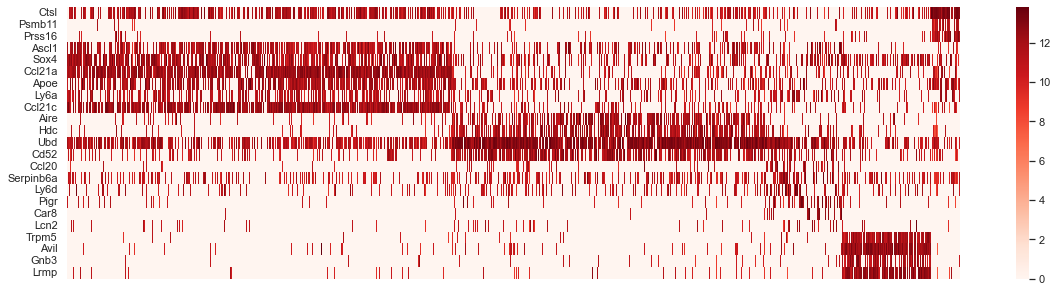

In [93]:
f, ax = plt.subplots(figsize=(20, 5))
ax = sns.heatmap(np.log(data_normalized + 1), yticklabels=True, xticklabels=False, cmap='Reds')
plt.show()

# Шаг 4 Визуализируем все 2341 клетки на UMAP и PCA

Для этого предлагается использовать пакеты anndata (https://anndata-tutorials.readthedocs.io/en/latest/getting-started.html) и scanpy (https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html).

In [94]:
# counts_norm - normalized data
counts_norm = data_normalized

adata = ad.AnnData(counts_norm.T)
sc.pp.log1p(adata)
adata.var_names = list(counts_norm.index)
adata.obs_names = [f"Cell_{i:d}" for i in range(adata.n_obs)]

/var/folders/74/3bw80qxj63382vp4tks4kyb80000gn/T/ipykernel_29795/3898072153.py:4: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(counts_norm.T)


In [100]:
# add to metadata cell type provided by authors

cells_type_data = thymus_epithel_clusts.loc['group', counts_norm.columns].reset_index().to_numpy()[:, 1]

In [102]:
# cells_type_data - cell type provided by authors
adata.obs["cell_type"] = cells_type_data

In [103]:
sc.pp.pca(adata, n_comps=5)

In [104]:
colors = ['red', 'green', 'black', 'pink', 'orange']
cmap = get_cmap(ListedColormap(colors))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


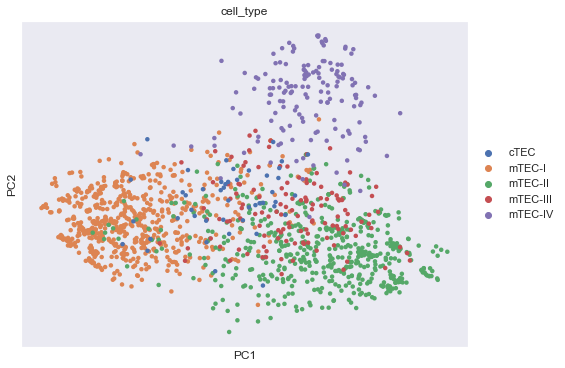

cTEC - red
mTEC-I - green
mTEC-II - black
mTEC-III - pink
mTEC-IV - orange


In [105]:
groups = ['cTEC', 'mTEC-I', 'mTEC-II', 'mTEC-III', 'mTEC-IV']

f, ax = plt.subplots(figsize=(8, 6))
sc.pl.pca(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)
for i, c in enumerate(colors):
  print(f'{groups[i]} - {c}')

In [106]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


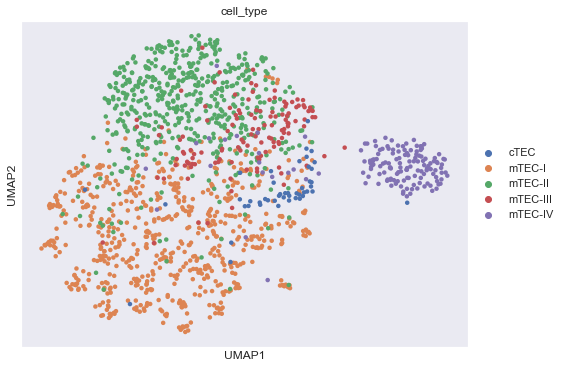

cTEC - red
mTEC-I - green
mTEC-II - black
mTEC-III - pink
mTEC-IV - orange


In [107]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.umap(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)
plt.show()
for i, c in enumerate(colors):
  print(f'{groups[i]} - {c}')